## Initialize spark

In [1]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/home/ebrahim/Downloads/spark-3.0.1-bin-hadoop3.2"

In [2]:
import json
import os
import findspark
from pyspark.sql.session import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import types as T
from pyspark.sql import Window

findspark.init()

In [3]:
# findspark.init()
spark = SparkSession.builder.master("local[*]").getOrCreate()

## Read all profiles

In [4]:
profiles_df = spark.read.json('./cleaned/*.json').cache()

In [5]:
profiles_df

DataFrame[age: string, children: string, description: string, drinking: string, email: string, ethnicity: string, gender: string, images: array<string>, inet: string, intent: string, justifications: array<string>, location: string, match_age: string, messages: array<string>, month_reported: string, name: string, occupation: string, orientation: string, phone: string, religion: string, scam: bigint, smoking: string, status: string, tags: array<string>, username: string, year_reported: string]

In [6]:
profiles_df.count()

44263

In [7]:
profiles_df.groupBy(F.col("scam")).count().show(10)

+----+-----+
|scam|count|
+----+-----+
|   0|36276|
|   1| 7987|
+----+-----+



### Dempographic analysis
* Age
* Gender
* Ethnicity
* Children
* Marital status
* Occupation

#### Age

In [8]:
profiles_df.describe(["age"]).show(10)

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             42765|
|   mean|41.435239097392724|
| stddev| 11.08618575137918|
|    min|                18|
|    max|                88|
+-------+------------------+



In [9]:
profiles_df.filter(~F.col("age").isNull()).filter(
    F.col("scam") == 1
).describe("age").show(10)

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              6839|
|   mean| 42.62143588243895|
| stddev|11.146954365220273|
|    min|                18|
|    max|                78|
+-------+------------------+



In [10]:
profiles_df.filter(~F.col("age").isNull()).filter(
    F.col("scam") == 0
).describe("age").show(10)

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             35926|
|   mean| 41.20943049601959|
| stddev|11.060330846758077|
|    min|                18|
|    max|                88|
+-------+------------------+



In [11]:
age_pdf = profiles_df.filter(~F.col("age").isNull()).withColumn(
    "scam",
    F.when(F.col("scam") == 0, F.lit("Real")).otherwise(F.lit("scam")),
).groupBy(F.col("age"), F.col("scam")).count().toPandas()

array([<AxesSubplot:title={'center':'(count, Real)'}, xlabel='age'>,
       <AxesSubplot:title={'center':'(count, scam)'}, xlabel='age'>],
      dtype=object)

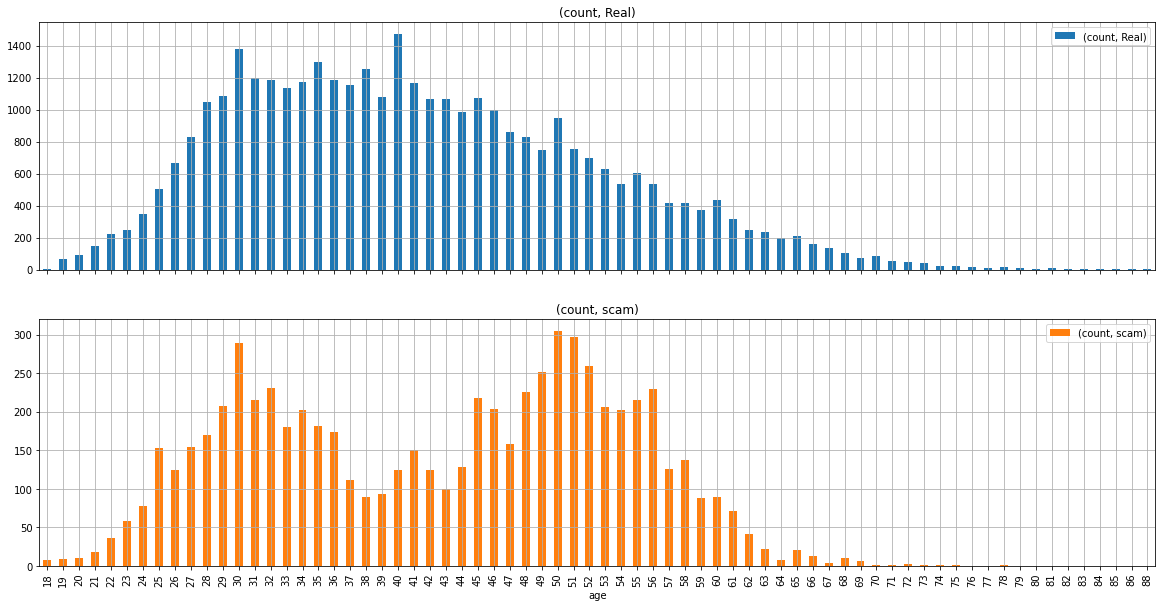

In [12]:
age_pdf.set_index(["age", "scam"]).sort_index().unstack(level=1).plot(figsize=(20,10), subplots=True, kind="bar", grid=True)

> The age distribution looks interesting. Both have around the same mean however the distribution is different. For scammers it is clear we have to groups (27-36, 45-56)

#### Gender

In [13]:
gender_pdf = profiles_df.withColumn(
    "scam",
    F.when(F.col("scam") == 0, F.lit("Real")).otherwise(F.lit("scam")),
).groupBy(F.col("gender"), F.col("scam")).count().toPandas()

array([<AxesSubplot:ylabel='(count, Real)'>,
       <AxesSubplot:ylabel='(count, scam)'>], dtype=object)

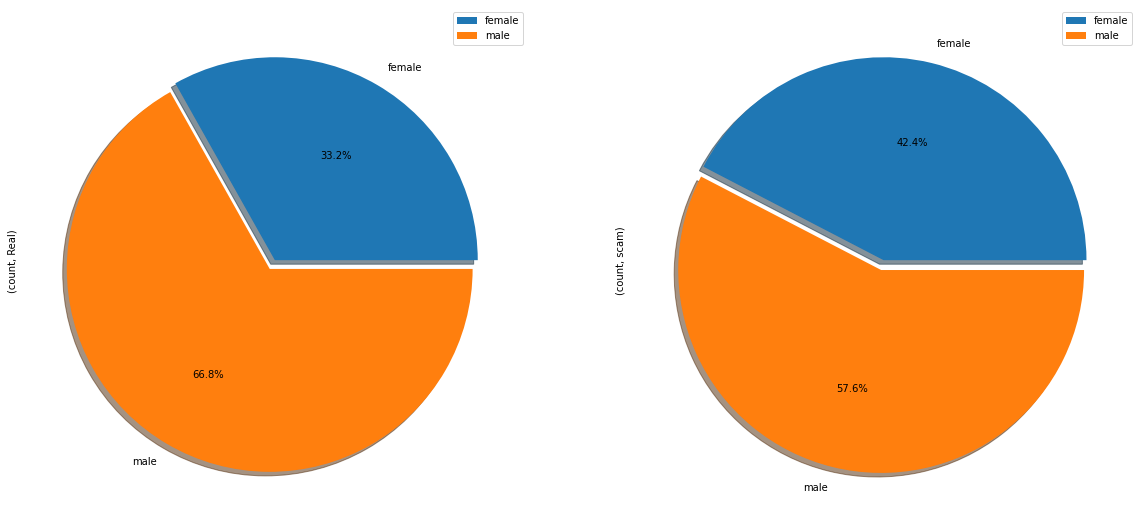

In [14]:
gender_pdf.set_index(["gender", "scam"]).sort_index().unstack(level=1).plot(figsize=(20,10), subplots=True, kind="pie", shadow=True, explode=(0, 0.05), autopct='%1.1f%%')

#### Age & gender

In [15]:
gender_age_pdf = profiles_df.filter(~F.col("age").isNull()).withColumn(
    "scam",
    F.when(F.col("scam") == 0, F.lit("Real")).otherwise(F.lit("scam")),
).groupBy(F.col("age"), F.col("gender"), F.col("scam")).count().toPandas()

array([<AxesSubplot:title={'center':'(count, female, Real)'}, xlabel='age'>,
       <AxesSubplot:title={'center':'(count, female, scam)'}, xlabel='age'>,
       <AxesSubplot:title={'center':'(count, male, Real)'}, xlabel='age'>,
       <AxesSubplot:title={'center':'(count, male, scam)'}, xlabel='age'>],
      dtype=object)

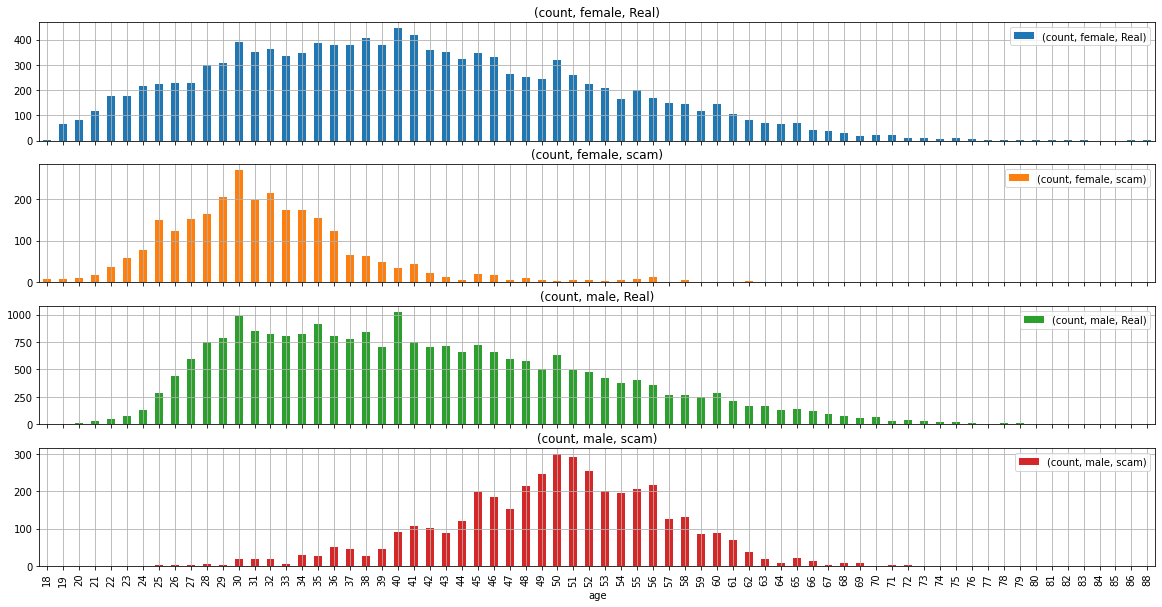

In [16]:
gender_age_pdf.set_index(["age", "gender", "scam"]).sort_index().unstack(level=["gender", "scam"]).plot(figsize=(20,10), subplots=True, kind='bar', grid=True)

#### Ethnicity

In [17]:
ethnicity_pdf = profiles_df.withColumn(
    "scam",
    F.when(F.col("scam") == 0, F.lit("Real")).otherwise(F.lit("scam")),
).groupBy(F.col("ethnicity"), F.col("scam")).count().toPandas()

<AxesSubplot:ylabel='ethnicity'>

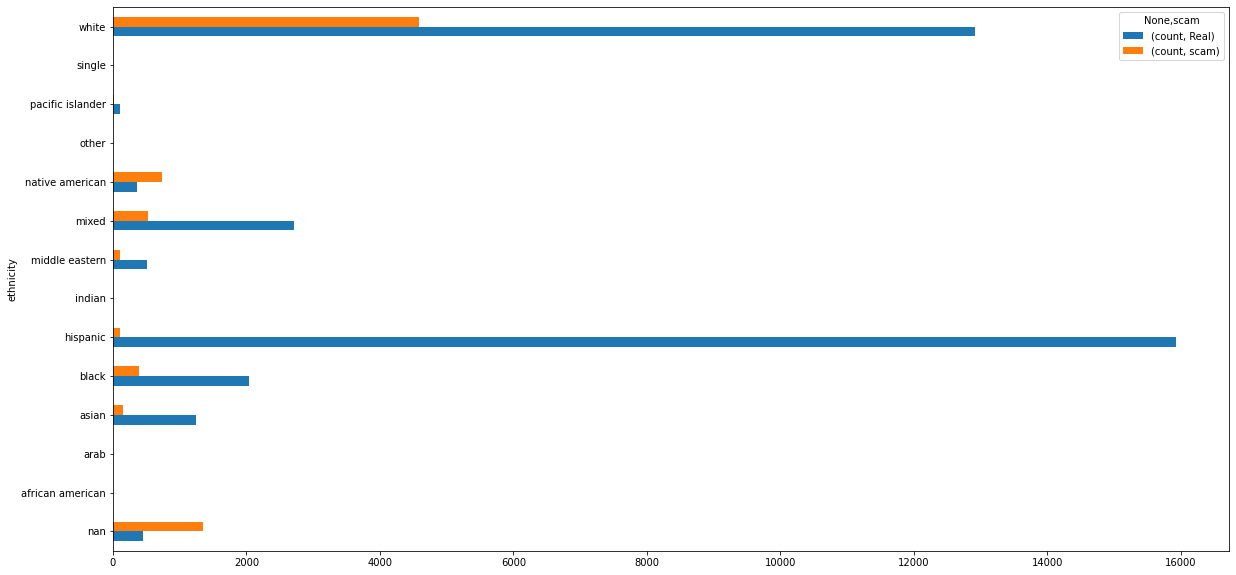

In [18]:
ethnicity_pdf.set_index(["ethnicity", "scam"]).sort_index().unstack(level=1).plot(figsize=(20,10), subplots=False, kind="barh")

#### Children

In [19]:
children_pdf = profiles_df.withColumn(
    "scam",
    F.when(F.col("scam") == 0, F.lit("Real")).otherwise(F.lit("scam")),
).groupBy(F.col("children"), F.col("scam")).count().toPandas()

<AxesSubplot:ylabel='children'>

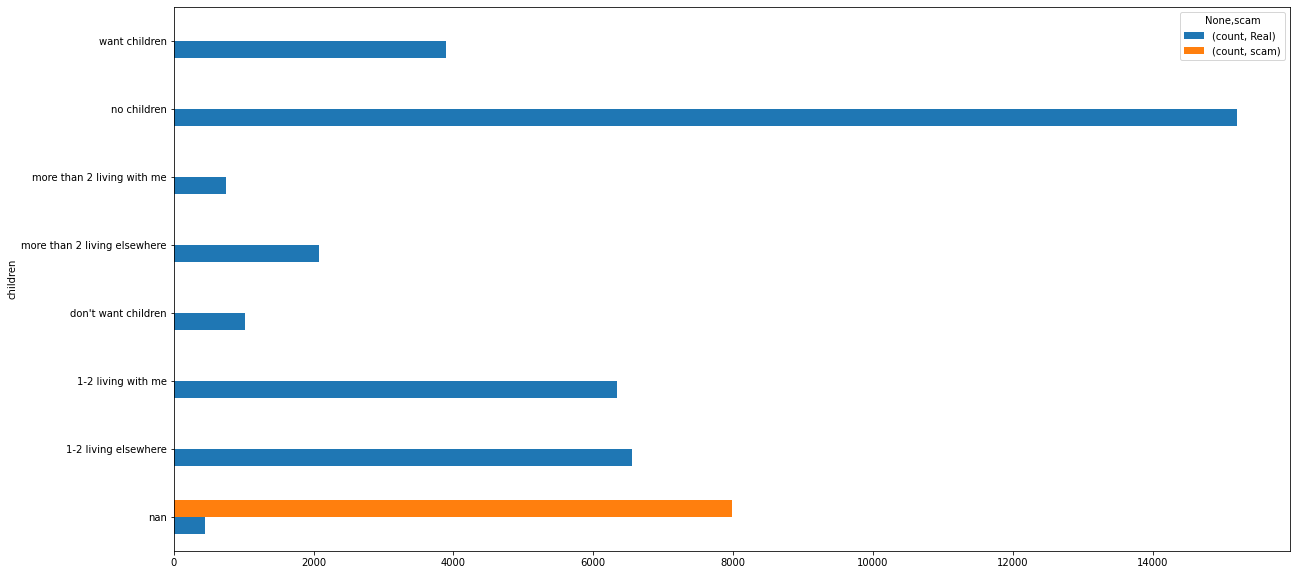

In [20]:
children_pdf.set_index(["children", "scam"]).sort_index().unstack(level=1).plot(figsize=(20,10), subplots=False, kind="barh")

> No data for scammers

#### Marital status

In [21]:
profiles_df.select(F.col("status")).distinct().sort("status").show(30, truncate=False)

+-----------------------------------+
|status                             |
+-----------------------------------+
|null                               |
|civil engineer                     |
|divorce                            |
|divorced                           |
|i am taken                         |
|in relationship                    |
|married                            |
|married (and looking for marriage) |
|separated                          |
|seperated                          |
|seprated                           |
|signle                             |
|single                             |
|singles                            |
|singlescammer’s real name: olusegun|
|widow                              |
|widowed                            |
|widower                            |
|windoew                            |
|window                             |
|window – his spelling              |
+-----------------------------------+



In [22]:
status_pdf = profiles_df.withColumn(
    "scam",
    F.when(F.col("scam") == 0, F.lit("Real")).otherwise(F.lit("scam")),
).withColumn(
    "status",
    F.when(
        F.col("status").startswith("wi"),
        F.lit("widowed"),
    ).when(
        F.col("status").startswith("di"),
        F.lit("divorced"),
    ).when(
        F.col("status").startswith("sep"),
        F.lit("separated"),
    ).when(
        F.col("status").startswith("married"),
        F.lit("married"),
    ).when(
        F.col("status") == "in relationship",
        F.col("status"),
    ).when(
        F.col("status").startswith("sing"),
        F.lit("single"),
    ).otherwise(F.lit("other")),
).groupBy(F.col("status"), F.col("scam")).count().toPandas()

<AxesSubplot:ylabel='status'>

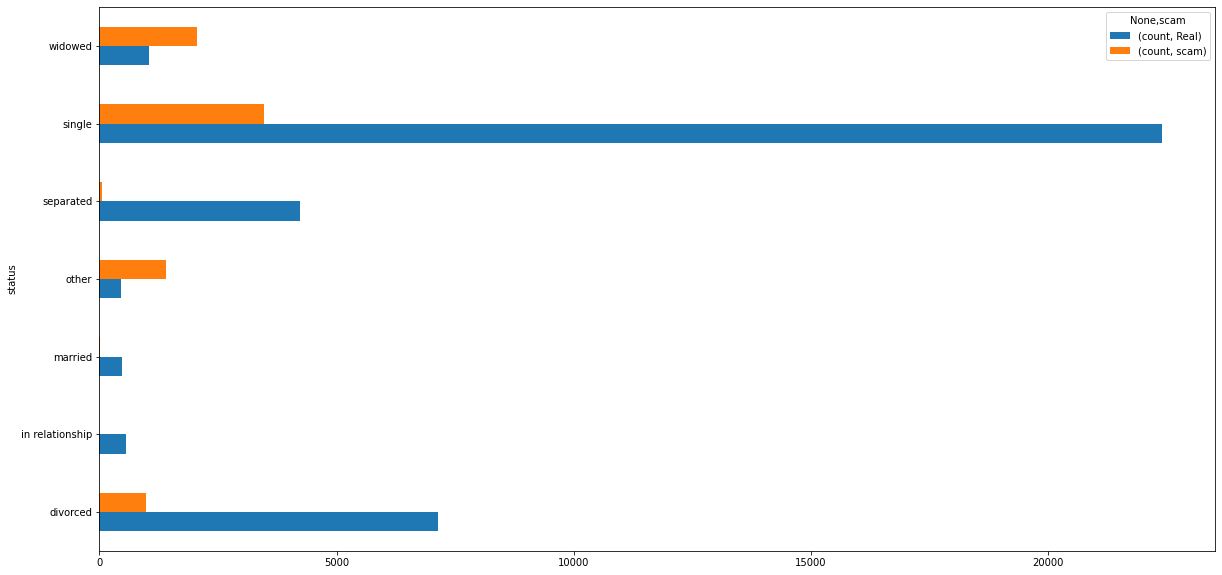

In [23]:
status_pdf.set_index(["status", "scam"]).sort_index().unstack(level=1).plot(figsize=(20,10), subplots=False, kind="barh")

> Not significant source

### Religion

In [26]:
profiles_df.select(F.col("religion")).distinct().count()

9

In [29]:
profiles_df.groupBy("scam", "religion").count().show(10)

+----+---------+-----+
|scam| religion|count|
+----+---------+-----+
|   0|     null|  447|
|   0|Christian|18451|
|   0|Spiritual| 3311|
|   0|  Atheist| 2059|
|   1|     null| 7987|
|   0|   Muslim|  840|
|   0|   Jewish|  229|
|   0|    Other|10501|
|   0|    Hindu|  211|
|   0| Buddhist|  227|
+----+---------+-----+



> No data for scammer

#### Occupation

In [24]:
profiles_df.select(F.col("occupation")).distinct().count()

8346

In [57]:
profiles_df.filter(F.col("scam") == 0).groupBy(F.col("occupation")).agg(
    (F.count('*') / profiles_df.count()).alias("freq")
).sort("freq", ascending=False).show(20, truncate=False)

+-------------+---------------------+
|occupation   |freq                 |
+-------------+---------------------+
|null         |0.3311569482411947   |
|retired      |0.011725368818200303 |
|estudiante   |0.01120574746402187  |
|comerciante  |0.008991708650565935 |
|independiente|0.008472087296387503 |
|ingeniero    |0.007952465942209068 |
|self employed|0.0049251067482999344|
|abogado      |0.0048121455843481015|
|docente      |0.004631407722025168 |
|teacher      |0.004608815489234801 |
|empresario   |0.004608815489234801 |
|student      |0.004382893161331135 |
|manager      |0.003931048505523801 |
|chef         |0.0037954951087816008|
|engineer     |0.003727718410410501 |
|administrador|0.003501796082506834 |
|enfermera    |0.002688475702053634 |
|construction |0.002552922305311434 |
|ama de casa  |0.002530330072521067 |
|profesor     |0.002530330072521067 |
+-------------+---------------------+
only showing top 20 rows



In [58]:
profiles_df.filter(F.col("scam") == 1).groupBy(F.col("occupation")).agg(
    (F.count('*').alias('count') / profiles_df.count()).alias("freq")
).sort("freq", ascending=False).show(20, truncate=False)

+---------------------+---------------------+
|occupation           |freq                 |
+---------------------+---------------------+
|null                 |0.034837222962745405 |
|military             |0.015498271694191537 |
|self employed        |0.01134130086076407  |
|engineer             |0.01120574746402187  |
|student              |0.010505388247520503 |
|self-employed        |0.004653999954815535 |
|nurse                |0.004382893161331135 |
|business             |0.0038632718071527007|
|sales                |0.002598106770892167 |
|contractor           |0.0024399611413596007|
|construction         |0.002349592210198134 |
|engineering          |0.0021688543478752004|
|doctor               |0.0018977475543908004|
|civil engineer       |0.0018299708560197004|
|army                 |0.0013555339674220003|
|teacher              |0.001107019406727967 |
|model                |0.0010618349411472335|
|manager              |9.036893116146669E-4 |
|construction engineer|8.359126132

> Not significant

In [26]:
occupation_pdf = profiles_df.withColumn(
    "scam",
    F.when(F.col("scam") == 0, F.lit("Real")).otherwise(F.lit("scam")),
).groupBy(F.col("occupation"), F.col("scam")).count().toPandas()

In [30]:
spark.stop()